In [1]:
import pandas as pd
import numpy as np


## Load data

In [3]:
new_df = pd.read_hdf('D:/holistic_features_deception/data_with_gender.h5')

In [4]:
new_df = new_df[new_df.columns[list(range(720))]]

In [5]:
import random
random.seed(0)
samples= list(new_df.person_id.unique())
num_samples = len(samples)
train_ids = random.sample(samples,round(0.9*num_samples))
test_ids = list(set(samples)-set(train_ids))

df_train=pd.DataFrame()
for i in train_ids:
  df_train=df_train.append(new_df[new_df['person_id']==i])

df_test=pd.DataFrame()
for i in test_ids:
  df_test=df_test.append(new_df[new_df['person_id']==i])

X_train = df_train.drop('y',axis=1)
X_test = df_test.drop('y',axis=1)
y_train = df_train['y']
y_test = df_test['y']

In [6]:
for i in X_train.columns:
    print(i)

timestamp
confidence
gaze_0_x
gaze_0_y
gaze_0_z
gaze_1_x
gaze_1_y
gaze_1_z
gaze_angle_x
gaze_angle_y
eye_lmk_x_0
eye_lmk_x_1
eye_lmk_x_2
eye_lmk_x_3
eye_lmk_x_4
eye_lmk_x_5
eye_lmk_x_6
eye_lmk_x_7
eye_lmk_x_8
eye_lmk_x_9
eye_lmk_x_10
eye_lmk_x_11
eye_lmk_x_12
eye_lmk_x_13
eye_lmk_x_14
eye_lmk_x_15
eye_lmk_x_16
eye_lmk_x_17
eye_lmk_x_18
eye_lmk_x_19
eye_lmk_x_20
eye_lmk_x_21
eye_lmk_x_22
eye_lmk_x_23
eye_lmk_x_24
eye_lmk_x_25
eye_lmk_x_26
eye_lmk_x_27
eye_lmk_x_28
eye_lmk_x_29
eye_lmk_x_30
eye_lmk_x_31
eye_lmk_x_32
eye_lmk_x_33
eye_lmk_x_34
eye_lmk_x_35
eye_lmk_x_36
eye_lmk_x_37
eye_lmk_x_38
eye_lmk_x_39
eye_lmk_x_40
eye_lmk_x_41
eye_lmk_x_42
eye_lmk_x_43
eye_lmk_x_44
eye_lmk_x_45
eye_lmk_x_46
eye_lmk_x_47
eye_lmk_x_48
eye_lmk_x_49
eye_lmk_x_50
eye_lmk_x_51
eye_lmk_x_52
eye_lmk_x_53
eye_lmk_x_54
eye_lmk_x_55
eye_lmk_y_0
eye_lmk_y_1
eye_lmk_y_2
eye_lmk_y_3
eye_lmk_y_4
eye_lmk_y_5
eye_lmk_y_6
eye_lmk_y_7
eye_lmk_y_8
eye_lmk_y_9
eye_lmk_y_10
eye_lmk_y_11
eye_lmk_y_12
eye_lmk_y_13
eye_lmk_y

In [8]:
X_train =X_train.reset_index()
X_test=X_test.reset_index()
y_train=y_train.reset_index()
y_test=y_test.reset_index()

In [9]:
X_train.drop(['index','WC','person_id','question'],axis=True,inplace=True)
X_test.drop(['index','WC','person_id','question'],axis=True,inplace=True)
y_train.drop(['index'],axis=True,inplace=True)
y_test.drop(['index'],axis=True,inplace=True)

In [10]:
categorical_list = ['positive_assumption','negative_assumption','Gender_Male']
numerical_list = list(X_train.columns)
for i in range(len(categorical_list)):
    numerical_list.remove(categorical_list[i])

In [59]:
# categorical_list = []
# numerical_list = []
# for i in X_train.columns.tolist():
#     if (X_train[i].dtype=='object') or (X_train[i].dtype=='bool'):
#         categorical_list.append(i)
#     else:
#         numerical_list.append(i)
# print('Number of categorical features:', str(len(categorical_list)))
# print('Number of numerical features:', str(len(numerical_list)))

In [11]:
X_test = X_test.reset_index()
X_train = X_train.reset_index()

In [12]:
X_train.drop(['index'],inplace=True,axis=1)
X_test.drop(['index'],inplace=True,axis=1)

In [62]:
# X_train.drop(['WC'],inplace=True,axis=1)
# X_test.drop(['WC'],inplace=True,axis=1)

In [63]:
# from sklearn.preprocessing import StandardScaler
# col_transform =list(X_train.columns)
# col_transform.remove('person_id')
# col_transform.remove('question')
# col_transform.remove('Gender_Male')
# col_transform.remove('negative_assumption')
# col_transform.remove('positive_assumption')

# scale = StandardScaler().fit(X_train[col_transform])
# X_train[col_transform] = pd.DataFrame(scale.transform(X_train[col_transform]),columns=col_transform)
# X_test[col_transform] = pd.DataFrame(scale.transform(X_test[col_transform]),columns=col_transform)

In [13]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# Instantiate encoder/scaler
scaler = StandardScaler()
ohe    = OneHotEncoder(sparse=False,drop='if_binary')

# Scale and Encode Separate Columns
scaled_columns  = pd.DataFrame(scaler.fit_transform(X_train[numerical_list]), columns = X_train[numerical_list].columns)
encoded_columns =    pd.DataFrame(ohe.fit_transform(X_train[categorical_list]), columns =ohe.get_feature_names(categorical_list))

# Concatenate (Column-Bind) Processed Columns Back Together
X_train = pd.concat([scaled_columns.reset_index(), encoded_columns.reset_index()], axis=1)
X_train.drop(['index','index'], inplace=True,axis=1)

In [14]:
scaled_columns  = pd.DataFrame(scaler.transform(X_test[numerical_list]), columns = X_test[numerical_list].columns)
encoded_columns =    pd.DataFrame(ohe.transform(X_test[categorical_list]), columns =ohe.get_feature_names(categorical_list))

# Concatenate (Column-Bind) Processed Columns Back Together
X_test = pd.concat([scaled_columns.reset_index(), encoded_columns.reset_index()], axis=1)
X_test.drop(['index','index'], inplace=True,axis=1)

In [15]:
df_train = X_train.copy()
df_train['y'] = y_train.values

In [ ]:
df_train.isna().sum().sum()

## Feature selection

### null importance

In [31]:
# df_train = X_train.copy()
# y_trai
df_train['y'] = y_train.values

In [7]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
import time
from lightgbm import LGBMClassifier
import lightgbm as lgb

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter('ignore', UserWarning)

import gc
gc.enable()

In [ ]:
data = df_train.copy()



# categorical_feats = df_train.columns[[-1,-2,-3]]

# print(categorical_feats)
# for f_ in categorical_feats:
#     data[f_], _ = pd.factorize(data[f_])
#     # Set feature type as categorical
#     data[f_] = data[f_].astype('category')

In [ ]:
data

,timestamp,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,...,AU26_c,AU28_c,AU45_c,question,person_id,WC,OtherP,y,positive_assumption,negative_assumption
6415,0.000000,0.98,0.326309,0.274022,-0.904674,0.158873,0.243419,-0.956821,0.255,0.271,...,0,0,0,1,28,119,0.0,0,0,0
6416,0.040000,0.98,0.336460,0.274016,-0.900949,0.161493,0.241291,-0.956922,0.262,0.271,...,0,0,0,1,28,119,0.0,0,0,0
6417,0.080000,0.98,0.341593,0.269892,-0.900263,0.166425,0.237461,-0.957035,0.267,0.267,...,0,0,0,1,28,119,0.0,0,0,0
6418,0.120000,0.98,0.341751,0.269591,-0.900292,0.166547,0.237231,-0.957070,0.267,0.266,...,0,0,0,1,28,119,0.0,0,0,0
6419,0.160000,0.98,0.341803,0.269438,-0.900319,0.166416,0.237016,-0.957146,0.267,0.266,...,0,0,0,1,28,119,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860059,44.320000,0.98,0.191839,0.410695,-0.891362,0.040223,0.424845,-0.904372,0.129,0.435,...,1,0,0,24,24,100,0.0,1,0,0
860060,44.360001,0.98,0.189389,0.405606,-0.894212,0.039152,0.419084,-0.907103,0.126,0.429,...,1,0,0,24,24,100,0.0,1,0,0
860061,44.400002,0.98,0.187418,0.443895,-0.876260,0.030524,0.459217,-0.887799,0.123,0.473,...,0,0,0,24,24,100,0.0,1,0,0
860062,44.439999,0.93,0.186500,0.458894,-0.868697,0.029780,0.475174,-0.879388,0.123,0.491,...,0,0,0,24,24,100,0.0,1,0,0


In [ ]:
def get_feature_importances(data, shuffle, seed=None):
    # Gather real features
    train_features = [f for f in data if f not in ['y', 'question','WC','positive_assumption','negative_assumption']]
    # Go over fold and keep track of CV score (train and valid) and feature importances
    
    # Shuffle target if required
    y = data['y'].copy()
    if shuffle:
        # Here you could as well use a binomial distribution
        y = data['y'].copy().sample(frac=1.0)
    
    # Fit LightGBM in RF mode, yes it's quicker than sklearn RandomForest
    dtrain = lgb.Dataset(data[train_features], y, free_raw_data=False, silent=True)
    lgb_params = {
        'objective': 'binary',
        'boosting_type': 'rf',
        'subsample': 0.623,
        'colsample_bytree': 0.7,
        'num_leaves': 127,
        'max_depth': 8,
        'seed': seed,
        'bagging_freq': 1,
        'n_jobs': 4
    }
    
    # Fit the model
    clf = lgb.train(params=lgb_params, train_set=dtrain, num_boost_round=200)

    # Get feature importances
    imp_df = pd.DataFrame()
    imp_df["feature"] = list(train_features)
    imp_df["importance_gain"] = clf.feature_importance(importance_type='gain')
    imp_df["importance_split"] = clf.feature_importance(importance_type='split')
    imp_df['trn_score'] = roc_auc_score(y, clf.predict(data[train_features]))
    
    return imp_df

In [ ]:
np.random.seed(123)
# Get the actual importance, i.e. without shuffling
actual_imp_df = get_feature_importances(data=data, shuffle=False)

[LightGBM] [Info] Number of positive: 421357, number of negative: 366120
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 2.064860 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 176490
[LightGBM] [Info] Number of data points in the train set: 787477, number of used features: 713
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.535072 -> initscore=0.140519
[LightGBM] [Info] Start training from score 0.140519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
actual_imp_df.trn_score.unique()

array([0.72580373])

In [ ]:
null_imp_df = pd.DataFrame()
nb_runs = 80
import time
start = time.time()
dsp = ''
for i in range(nb_runs):
    # Get current run importances
    imp_df = get_feature_importances(data=data, shuffle=True)
    imp_df['run'] = i + 1 
    # Concat the latest importances with the old ones
    null_imp_df = pd.concat([null_imp_df, imp_df], axis=0)
    # Erase previous message
    for l in range(len(dsp)):
        print('\b', end='', flush=True)
    # Display current run and time used
    spent = (time.time() - start) / 60
    dsp = 'Done with %4d of %4d (Spent %5.1f min)' % (i + 1, nb_runs, spent)
    print(dsp, end='', flush=True)

[LightGBM] [Info] Number of positive: 421357, number of negative: 366120
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 2.049123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 176490
[LightGBM] [Info] Number of data points in the train set: 787477, number of used features: 713
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.535072 -> initscore=0.140519
[LightGBM] [Info] Start training from score 0.140519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

KeyboardInterrupt: 

In [ ]:
null_imp_df.head()

In [ ]:
def display_distributions(actual_imp_df_, null_imp_df_, feature_):
    plt.figure(figsize=(13, 6))
    gs = gridspec.GridSpec(1, 2)
    # Plot Split importances
    ax = plt.subplot(gs[0, 0])
    a = ax.hist(null_imp_df_.loc[null_imp_df_['feature'] == feature_, 'importance_split'].values, label='Null importances')
    ax.vlines(x=actual_imp_df_.loc[actual_imp_df_['feature'] == feature_, 'importance_split'].mean(), 
               ymin=0, ymax=np.max(a[0]), color='r',linewidth=10, label='Real Target')
    ax.legend()
    ax.set_title('Split Importance of %s' % feature_.upper(), fontweight='bold')
    plt.xlabel('Null Importance (split) Distribution for %s ' % feature_.upper())
    # Plot Gain importances
    ax = plt.subplot(gs[0, 1])
    a = ax.hist(null_imp_df_.loc[null_imp_df_['feature'] == feature_, 'importance_gain'].values, label='Null importances')
    ax.vlines(x=actual_imp_df_.loc[actual_imp_df_['feature'] == feature_, 'importance_gain'].mean(), 
               ymin=0, ymax=np.max(a[0]), color='r',linewidth=10, label='Real Target')
    ax.legend()
    ax.set_title('Gain Importance of %s' % feature_.upper(), fontweight='bold')
    plt.xlabel('Null Importance (gain) Distribution for %s ' % feature_.upper())

In [ ]:
display_distributions(actual_imp_df_=actual_imp_df, null_imp_df_=null_imp_df, feature_='LIVINGAPARTMENTS_AVG')

In [ ]:
feature_scores = []
for _f in actual_imp_df['feature'].unique():
    f_null_imps_gain = null_imp_df.loc[null_imp_df['feature'] == _f, 'importance_gain'].values
    f_act_imps_gain = actual_imp_df.loc[actual_imp_df['feature'] == _f, 'importance_gain'].mean()
    gain_score = np.log(1e-10 + f_act_imps_gain / (1 + np.percentile(f_null_imps_gain, 75)))  # Avoid didvide by zero
    f_null_imps_split = null_imp_df.loc[null_imp_df['feature'] == _f, 'importance_split'].values
    f_act_imps_split = actual_imp_df.loc[actual_imp_df['feature'] == _f, 'importance_split'].mean()
    split_score = np.log(1e-10 + f_act_imps_split / (1 + np.percentile(f_null_imps_split, 75)))  # Avoid didvide by zero
    feature_scores.append((_f, split_score, gain_score))

scores_df = pd.DataFrame(feature_scores, columns=['feature', 'split_score', 'gain_score'])

plt.figure(figsize=(16, 16))
gs = gridspec.GridSpec(1, 2)
# Plot Split importances
ax = plt.subplot(gs[0, 0])
sns.barplot(x='split_score', y='feature', data=scores_df.sort_values('split_score', ascending=False).iloc[0:70], ax=ax)
ax.set_title('Feature scores wrt split importances', fontweight='bold', fontsize=14)
# Plot Gain importances
ax = plt.subplot(gs[0, 1])
sns.barplot(x='gain_score', y='feature', data=scores_df.sort_values('gain_score', ascending=False).iloc[0:70], ax=ax)
ax.set_title('Feature scores wrt gain importances', fontweight='bold', fontsize=14)
plt.tight_layout()




### Correlation

In [16]:
application_sample1 = df_train.loc[df_train.y==1].sample(frac=0.5, replace=False)
print('label 1 sample size:', str(application_sample1.shape[0]))
application_sample0 = df_train.loc[df_train.y==0].sample(frac=0.5, replace=False)
print('label 0 sample size:', str(application_sample0.shape[0]))
application = pd.concat([application_sample1, application_sample0], axis=0)

label 1 sample size: 210678
label 0 sample size: 183060


In [17]:
categorical_list = []
numerical_list = []
for i in application.columns.tolist():
    if application[i].dtype=='object':
        categorical_list.append(i)
    else:
        numerical_list.append(i)
print('Number of categorical features:', str(len(categorical_list)))
print('Number of numerical features:', str(len(numerical_list)))

Number of categorical features: 0
Number of numerical features: 717


In [ ]:
# from sklearn.impute import SimpleImputer
# application[numerical_list] = SimpleImputer(strategy='median').fit_transform(application[numerical_list])

In [18]:
X = application.drop(['y'], axis=1)
y = application.y
feature_name = X.columns.tolist()

In [19]:
def cor_selector(X, y):
    cor_list = []
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-100:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

In [20]:
cor_support, cor_feature = cor_selector(X, y)
print(str(len(cor_feature)), 'selected features')
print(cor_feature)

100 selected features
['eye_lmk_x_18', 'X_65', 'Z_12', 'Z_11', 'x_36', 'eye_lmk_x_19', 'Y_13', 'eye_lmk_x_8', 'X_66', 'X_55', 'x_33', 'X_67', 'X_5', 'x_32', 'AU01_r', 'X_12', 'AU12_r', 'X_59', 'x_31', 'X_56', 'x_15', 'X_57', 'X_58', 'p_10', 'x_52', 'p_tx', 'x_53', 'X_11', 'X_6', 'x_54', 'x_63', 'x_64', 'p_8', 'x_51', 'X_10', 'x_0', 'X_7', 'x_14', 'x_50', 'X_9', 'X_8', 'x_65', 'x_62', 'x_55', 'p_22', 'x_61', 'AU06_r', 'p_13', 'x_66', 'p_11', 'AU17_r', 'x_56', 'x_1', 'x_13', 'x_49', 'x_67', 'AU04_r', 'x_57', 'x_12', 'x_60', 'x_58', 'x_2', 'x_48', 'x_11', 'x_59', 'x_10', 'AU23_r', 'x_9', 'x_3', 'x_8', 'p_7', 'p_31', 'p_17', 'AU09_r', 'x_4', 'x_7', 'Gender_Male_1', 'x_6', 'x_5', 'AU45_r', 'p_9', 'p_25', 'positive_assumption_1', 'p_28', 'p_26', 'gaze_0_y', 'p_rz', 'gaze_1_y', 'p_rx', 'p_12', 'gaze_angle_y', 'pose_Rx', 'What is your age (in years) ?', 'pose_Rz', 'AU15_r', 'p_24', 'p_20', 'p_4', 'negative_assumption_1', 'timestamp']


In [39]:
X.question

475872    0.923175
473168    0.520142
454942   -1.495022
477200    1.057519
471330    0.251453
            ...   
268729    1.191863
267006    0.923175
254904   -1.226334
257205   -0.823301
255864   -1.091990
Name: question, Length: 393738, dtype: float32




### chi


In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X_train)
chi_selector = SelectKBest(chi2, k=100)
chi_selector.fit(X_train.abs(), y_train)

SelectKBest(k=100, score_func=<function chi2 at 0x7f2a113dd710>)

In [20]:

chi_support = chi_selector.get_support()
chi_feature = X_train.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

100 selected features


### RFE

In [120]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=100, step=100, verbose=5)
rfe_selector.fit(X_train, y_train)


Fitting estimator with 6377 features.
Fitting estimator with 6277 features.
Fitting estimator with 6177 features.
Fitting estimator with 6077 features.
Fitting estimator with 5977 features.
Fitting estimator with 5877 features.
Fitting estimator with 5777 features.
Fitting estimator with 5677 features.
Fitting estimator with 5577 features.
Fitting estimator with 5477 features.
Fitting estimator with 5377 features.
Fitting estimator with 5277 features.
Fitting estimator with 5177 features.
Fitting estimator with 5077 features.
Fitting estimator with 4977 features.
Fitting estimator with 4877 features.
Fitting estimator with 4777 features.
Fitting estimator with 4677 features.
Fitting estimator with 4577 features.
Fitting estimator with 4477 features.
Fitting estimator with 4377 features.
Fitting estimator with 4277 features.
Fitting estimator with 4177 features.
Fitting estimator with 4077 features.
Fitting estimator with 3977 features.
Fitting estimator with 3877 features.
Fitting esti

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=100, step=100, verbose=5)

In [21]:
y_test


,y
0,1
1,1
2,1
3,1
4,1
...,...
74912,0
74913,0
74914,0
74915,0


In [122]:
rfe_support = rfe_selector.get_support()
rfe_feature = X_train.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

100 selected features


### SelectFromModel

In [137]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), '1.25*median')
embeded_lr_selector.fit(X_train, y_train)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X_train.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

2685 selected features


### SelectFromRF

In [17]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), threshold='1.25*median')
embeded_rf_selector.fit(X_train, y_train)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

2946 selected features


### SelectFromlgbm

In [ ]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, threshold='1.25*median')
embeded_lgb_selector.fit(X_train, y_train)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X_train.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

2941 selected features


# Models correlation features

In [29]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



import warnings
warnings.filterwarnings('ignore')

In [ ]:
features = X_train[cor_feature]
features2 = X_test[cor_feature]

In [ ]:
features.isna().sum().sum()

In [ ]:
X_test.isna().sum().sum()

In [32]:
from kfda import Kfda
cls = Kfda(kernel='rbf')
cls.fit(features, y_train)

print('Scores:')
test_score = cls.score(features2, y_test)
print(f'Test Score: {test_score}')
train_score = cls.score(features, y_train)
print(f'Train Score: {train_score}')
# predictions = cls.predict(test_sample)
# import matplotlib.pyplot as plt
from sklearn.metrics import classication_report
y_pred = cls.predict(X_test)
print(classication_report(y_test, y_pred))
# pos = plt.imshow(confusion)
# plt.colorbar(pos)

MemoryError: Unable to allocate 4.51 TiB for an array with shape (787477, 787477) and data type float64

In [37]:
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA



lda = LDA(solver="svd")
y_pred = lda.fit(features, y_train).predict(features2)
# splot = plot_data(lda, X, y, y_pred, fig_index=2 * i + 1)


    # QDA
#     qda = QDA()
#     y_pred = qda.fit(X, y, store_covariances=True).predict(X)

NameError: name 'classification_report' is not defined

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.99      0.97      0.98     33111
           1       0.98      0.99      0.98     41806

    accuracy                           0.98     74917
   macro avg       0.98      0.98      0.98     74917
weighted avg       0.98      0.98      0.98     74917



In [42]:
lda.get_params()

{'covariance_estimator': None,
 'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

In [65]:
from sklearn.model_selection import cross_val_score
# from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

# X, y = load_iris(return_X_y=True)
clf = AdaBoostClassifier()
# scores = cross_val_score(clf, features, y_train, cv=5)
# print(scores.mean())
clf.fit(features, y_train)
y_pred = (clf.predict(features2)>0.5).astype(int)
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))


MemoryError: Unable to allocate 300. MiB for an array with shape (787477, 100) and data type float32

In [ ]:
from sklearn.svm import SVC

svclassifier = SVC(gamma='auto')
svclassifier.fit(features, y_train)
y_pred = svclassifier.predict(features2)
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier


clf1 = DecisionTreeClassifier()
clf2 = KNeighborsClassifier()
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)],
                        voting='soft', weights=[2, 2, 2])

clf1 = clf1.fit(features, y_train)
clf2 = clf2.fit(features, y_train)
clf3 = clf3.fit(features, y_train)
eclf = eclf.fit(features, y_train)

for clf, label in zip([clf1, clf2, clf3, eclf], ['DecisionTreeClassifier', 'KNNClassifier', 'SVC', 'voting']):
    scores = cross_val_score(clf, features, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Logistic Regression score is 96.84717754314775% 

Support Vector Classifier score is 97.16219282672824%

Decision Tree Classifier score is 96.8138072800566%

Random Forest Classifier score is 96.93660984823205%

KNN Classifier score is 52.04960155905869% with k = 1
KNN Classifier score is 50.34504852036253% with k = 2
KNN Classifier score is 52.88919737843213% with k = 3
KNN Classifier score is 51.95616482240346% with k = 4
KNN Classifier score is 54.294752859831554% with k = 5
KNN Classifier score is 53.364389924850165% with k = 6
KNN Classifier score is 55.33056582618098% with k = 7
KNN Classifier score is 54.34013641763552% with k = 8
KNN Classifier score is 55.87516851982861% with k = 9
KNN Classifier score is 54.9408011532763% with k = 10
KNN Classifier score is 56.18751418236181% with k = 11
KNN Classifier score is 55.41599369969433% with k = 12
KNN Classifier score is 56.183509750790876% with k = 13
KNN Classifier score is 55.49741714163674% with k = 14
KNN Classifier score is 5

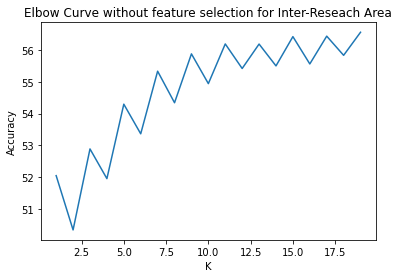


MLP Classifier score is 85.75089766007716%



In [40]:
# fitting logistic regression
lr = LogisticRegression()
lr.fit(features, y_train)
predictionsLR = lr.predict(features2)
scoreLR = accuracy_score(y_test, predictionsLR)
print(f"Logistic Regression score is {scoreLR * 100}% \n")

# fitting SVC
svc = svm.LinearSVC()
svc.fit(features, y_train)
predictionsSVC = svc.predict(features2)
scoreSVC = accuracy_score(y_test, predictionsSVC)
print(f"Support Vector Classifier score is {scoreSVC * 100}%\n")

# fitting decision tree classifier
clf = tree.DecisionTreeClassifier()
clf.fit(features, y_train)
predictionsTree = clf.predict(features2)
scoreTree = accuracy_score(y_test, predictionsTree)
print(f"Decision Tree Classifier score is {scoreTree * 100}%\n")

# fitting Random Forest classifier
clf1 = RandomForestClassifier(max_features=23)
clf1.fit(features, y_train)
predictionsTree1 = clf1.predict(features2)
scoreTree1 = accuracy_score(y_test, predictionsTree1)
print(f"Random Forest Classifier score is {scoreTree1 * 100}%\n")

# fitting XGBoost
# xgb = XGBClassifier()
# xgb.fit(features.to_numpy(), y_train)
# predictionsXGB = xgb.predict(X_test)
# predictionsXGB = (predictionsXGB>0.5).astype(int)
# scoreXGB = accuracy_score(y_test, predictionsXGB)
# print(f"XG Boost Classifier score is {scoreXGB * 100}%\n")

# fitting KNN Classifier
K = range(1, 20)
acc = []
for k in K:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(features, y_train)
    predictionsKNN = knn.predict(features2)
    scoreKNN = accuracy_score(y_test, predictionsKNN)
    print(f"KNN Classifier score is {scoreKNN * 100}% with k = {k}")
    acc.append(scoreKNN*100)

# Elbow plot:
plt.plot(K, acc)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title("Elbow Curve without feature selection for Inter-Reseach Area")

plt.show()

# MLP / ANN
classifier = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, activation='relu', solver='adam', random_state=1)
classifier.fit(features, y_train)
predictionsMLP = classifier.predict(features2)
scoreMLP = accuracy_score(y_test, predictionsMLP)
print(f"\nMLP Classifier score is {scoreMLP * 100}%\n")

In [50]:
features.columns

Index(['X_58', 'confidence', 'X_6', 'x_54', 'X_11', 'x_63', 'x_0', 'x_64',
       'x_51', 'p_18', 'x_14', 'x_50', 'p_22', 'x_62', 'x_65', 'X_7', 'X_10',
       'x_55', 'X_8', 'X_9', 'x_61', 'x_66', 'AU04_r', 'x_1', 'x_56', 'x_49',
       'x_13', 'x_67', 'x_57', 'p_11', 'x_12', 'x_60', 'x_2', 'x_58', 'AU17_r',
       'x_48', 'p_13', 'x_59', 'x_11', 'p_7', 'AU09_r', 'x_10', 'AU23_r',
       'x_3', 'x_9', 'positive_assumption_1', 'x_8', 'gaze_0_y', 'p_17',
       'p_rx', 'x_4', 'x_7', 'gaze_1_y', 'p_31', 'x_6', 'x_5', 'p_28',
       'Gender_Male_1', 'gaze_angle_y', 'pose_Rx', 'p_25', 'p_12', 'AU45_r',
       'p_9', 'p_rz', 'p_26', 'AU15_r', 'pose_Rz', 'p_24',
       'What is your age (in years) ?', 'p_4', 'question_15', 'p_20',
       'negative_assumption_1', 'question_4', 'question_1', 'timestamp',
       'question_25', 'question_12', 'question_5', 'question_13',
       'question_17', 'question_26', 'question_2', 'question_18',
       'question_19', 'question_3', 'question_21', 'question

No handles with labels found to put in legend.


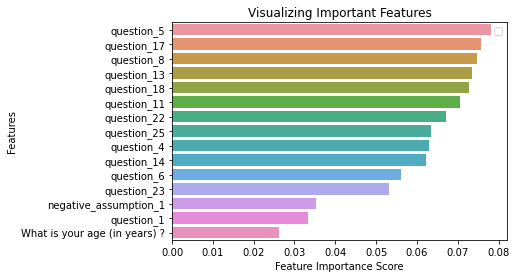

In [54]:
from sklearn.metrics import classification_report,confusion_matrix
#Create a Gaussian Classifier
# clf=RandomForestClassifier()
# # RandomForestClassifier()
# #Train the model using the training sets y_pred=clf.predict(X_test)
# clf.fit(features,y_train)
# y_pred=clf.predict(features2)
# print(classification_report(y_test,y_pred))
# import pandas as pd
feature_imp = pd.Series(clf.feature_importances_ ,index=features.columns).sort_values(ascending=False)
feature_imp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp[:15], y=feature_imp.index[:15],orient='h')
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [114]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(features, y_train).predict(features2)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 87 points : 38


In [115]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# evaluate the model
# model = GradientBoostingClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = GradientBoostingClassifier()
model.fit(features, y_train)
# make a single prediction
# row = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = model.predict(features2)

print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

           0       0.31      0.54      0.39        26
           1       0.71      0.49      0.58        61

    accuracy                           0.51        87
   macro avg       0.51      0.52      0.49        87
weighted avg       0.59      0.51      0.53        87



In [116]:
# histogram-based gradient boosting for classification in scikit-learn
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# evaluate the model
# model = HistGradientBoostingClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, features, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = HistGradientBoostingClassifier()
model.fit(features, y_train)
# make a single prediction
yhat = model.predict(features2)
print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

           0       0.38      0.71      0.49        24
           1       0.83      0.56      0.67        63

    accuracy                           0.60        87
   macro avg       0.61      0.63      0.58        87
weighted avg       0.71      0.60      0.62        87



In [117]:
# xgboost for classification
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# evaluate the model
# model = XGBClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, features, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = XGBClassifier()
model.fit(features, y_train)
# make a single prediction
yhat = model.predict(features2)
print(classification_report(yhat,y_test))

ValueError: ignored

In [118]:
# lightgbm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# evaluate the model
# model = LGBMClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, features, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = LGBMClassifier()
model.fit(features, y_train)
# make a single prediction
yhat = model.predict(features2)
print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

           0       0.40      0.64      0.49        28
           1       0.76      0.54      0.63        59

    accuracy                           0.57        87
   macro avg       0.58      0.59      0.56        87
weighted avg       0.65      0.57      0.59        87



# Models chi

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



import warnings
warnings.filterwarnings('ignore')

In [21]:
features = X_train[chi_feature]
features2 = X_test[chi_feature]

In [22]:
features.isna().sum().sum()

0

In [23]:
X_test.isna().sum().sum()

0

In [24]:
from sklearn.model_selection import cross_val_score
# from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

# X, y = load_iris(return_X_y=True)
clf = AdaBoostClassifier()
# scores = cross_val_score(clf, features, y_train, cv=5)
# print(scores.mean())
clf.fit(features, y_train)
y_pred = (clf.predict(features2)>0.5).astype(int)
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.31      0.54      0.39        26
           1       0.71      0.49      0.58        61

    accuracy                           0.51        87
   macro avg       0.51      0.52      0.49        87
weighted avg       0.59      0.51      0.53        87



In [25]:
from sklearn.svm import SVC

svclassifier = SVC(gamma='auto')
svclassifier.fit(features, y_train)
y_pred = svclassifier.predict(features2)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.04      0.08        45
           1       0.49      0.98      0.65        42

    accuracy                           0.49        87
   macro avg       0.58      0.51      0.37        87
weighted avg       0.58      0.49      0.36        87



In [26]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier


clf1 = DecisionTreeClassifier()
clf2 = KNeighborsClassifier()
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)],
                        voting='soft', weights=[2, 2, 2])

clf1 = clf1.fit(features, y_train)
clf2 = clf2.fit(features, y_train)
clf3 = clf3.fit(features, y_train)
eclf = eclf.fit(features, y_train)

for clf, label in zip([clf1, clf2, clf3, eclf], ['DecisionTreeClassifier', 'KNNClassifier', 'SVC', 'voting']):
    scores = cross_val_score(clf, features, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.52 (+/- 0.05) [DecisionTreeClassifier]
Accuracy: 0.55 (+/- 0.01) [KNNClassifier]
Accuracy: 0.52 (+/- 0.00) [SVC]
Accuracy: 0.51 (+/- 0.04) [voting]


Logistic Regression score is 50.57471264367817% 

Support Vector Classifier score is 51.724137931034484%

Decision Tree Classifier score is 51.724137931034484%

Random Forest Classifier score is 52.87356321839081%

KNN Classifier score is 48.275862068965516% with k = 1
KNN Classifier score is 54.02298850574713% with k = 2
KNN Classifier score is 50.57471264367817% with k = 3
KNN Classifier score is 51.724137931034484% with k = 4
KNN Classifier score is 50.57471264367817% with k = 5
KNN Classifier score is 51.724137931034484% with k = 6
KNN Classifier score is 48.275862068965516% with k = 7
KNN Classifier score is 51.724137931034484% with k = 8
KNN Classifier score is 48.275862068965516% with k = 9
KNN Classifier score is 49.42528735632184% with k = 10
KNN Classifier score is 48.275862068965516% with k = 11
KNN Classifier score is 50.57471264367817% with k = 12
KNN Classifier score is 48.275862068965516% with k = 13
KNN Classifier score is 54.02298850574713% with k = 14
KNN Classifier s

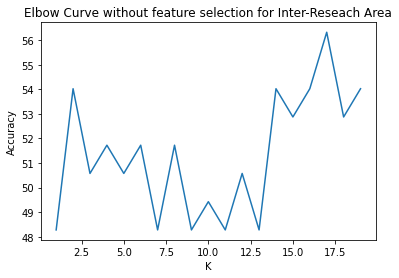


MLP Classifier score is 51.724137931034484%



In [27]:
# fitting logistic regression
lr = LogisticRegression()
lr.fit(features, y_train)
predictionsLR = lr.predict(features2)
scoreLR = accuracy_score(y_test, predictionsLR)
print(f"Logistic Regression score is {scoreLR * 100}% \n")

# fitting SVC
svc = svm.LinearSVC()
svc.fit(features, y_train)
predictionsSVC = svc.predict(features2)
scoreSVC = accuracy_score(y_test, predictionsSVC)
print(f"Support Vector Classifier score is {scoreSVC * 100}%\n")

# fitting decision tree classifier
clf = tree.DecisionTreeClassifier()
clf.fit(features, y_train)
predictionsTree = clf.predict(features2)
scoreTree = accuracy_score(y_test, predictionsTree)
print(f"Decision Tree Classifier score is {scoreTree * 100}%\n")

# fitting Random Forest classifier
clf1 = RandomForestClassifier(max_features=23)
clf1.fit(features, y_train)
predictionsTree1 = clf1.predict(features2)
scoreTree1 = accuracy_score(y_test, predictionsTree1)
print(f"Random Forest Classifier score is {scoreTree1 * 100}%\n")

# fitting XGBoost
# xgb = XGBClassifier()
# xgb.fit(features.to_numpy(), y_train)
# predictionsXGB = xgb.predict(X_test)
# predictionsXGB = (predictionsXGB>0.5).astype(int)
# scoreXGB = accuracy_score(y_test, predictionsXGB)
# print(f"XG Boost Classifier score is {scoreXGB * 100}%\n")

# fitting KNN Classifier
K = range(1, 20)
acc = []
for k in K:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(features, y_train)
    predictionsKNN = knn.predict(features2)
    scoreKNN = accuracy_score(y_test, predictionsKNN)
    print(f"KNN Classifier score is {scoreKNN * 100}% with k = {k}")
    acc.append(scoreKNN*100)

# Elbow plot:
plt.plot(K, acc)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title("Elbow Curve without feature selection for Inter-Reseach Area")

plt.show()

# MLP / ANN
classifier = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, activation='relu', solver='adam', random_state=1)
classifier.fit(features, y_train)
predictionsMLP = classifier.predict(features2)
scoreMLP = accuracy_score(y_test, predictionsMLP)
print(f"\nMLP Classifier score is {scoreMLP * 100}%\n")

In [28]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(features, y_train).predict(features2)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 87 points : 46


In [29]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# evaluate the model
# model = GradientBoostingClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = GradientBoostingClassifier()
model.fit(features, y_train)
# make a single prediction
# row = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = model.predict(features2)

print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

           0       0.36      0.53      0.43        30
           1       0.67      0.49      0.57        57

    accuracy                           0.51        87
   macro avg       0.51      0.51      0.50        87
weighted avg       0.56      0.51      0.52        87



In [30]:
# histogram-based gradient boosting for classification in scikit-learn
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# evaluate the model
# model = HistGradientBoostingClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, features, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = HistGradientBoostingClassifier()
model.fit(features, y_train)
# make a single prediction
yhat = model.predict(features2)
print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

           0       0.38      0.50      0.43        34
           1       0.60      0.47      0.53        53

    accuracy                           0.48        87
   macro avg       0.49      0.49      0.48        87
weighted avg       0.51      0.48      0.49        87



In [32]:
# xgboost for classification
from numpy import asarray
from numpy import mean
from numpy import std
# from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# evaluate the model
# model = XGBClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, features, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = XGBClassifier()
model.fit(features, y_train)
# make a single prediction
yhat = model.predict(features2)
print(classification_report(yhat,y_test))

ValueError: ignored

In [33]:
# lightgbm for classification
from numpy import mean
from numpy import std
# from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# evaluate the model
# model = LGBMClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, features, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = LGBMClassifier()
model.fit(features, y_train)
# make a single prediction
yhat = model.predict(features2)
print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

           0       0.33      0.50      0.40        30
           1       0.64      0.47      0.55        57

    accuracy                           0.48        87
   macro avg       0.49      0.49      0.47        87
weighted avg       0.54      0.48      0.50        87



# Models rfe features

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



import warnings
warnings.filterwarnings('ignore')

In [123]:
features = X_train[rfe_feature]
features2 = X_test[rfe_feature]

In [124]:
features.isna().sum().sum()

0

In [125]:
X_test.isna().sum().sum()

0

In [126]:
from sklearn.model_selection import cross_val_score
# from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

# X, y = load_iris(return_X_y=True)
clf = AdaBoostClassifier()
# scores = cross_val_score(clf, features, y_train, cv=5)
# print(scores.mean())
clf.fit(features, y_train)
y_pred = (clf.predict(features2)>0.5).astype(int)
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.42      0.68      0.52        28
           1       0.79      0.56      0.65        59

    accuracy                           0.60        87
   macro avg       0.60      0.62      0.59        87
weighted avg       0.67      0.60      0.61        87



In [127]:
from sklearn.svm import SVC

svclassifier = SVC(gamma='auto')
svclassifier.fit(features, y_train)
y_pred = svclassifier.predict(features2)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.24      0.34        45
           1       0.49      0.79      0.61        42

    accuracy                           0.51        87
   macro avg       0.52      0.52      0.47        87
weighted avg       0.52      0.51      0.47        87



In [128]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier


clf1 = DecisionTreeClassifier()
clf2 = KNeighborsClassifier()
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)],
                        voting='soft', weights=[2, 2, 2])

clf1 = clf1.fit(features, y_train)
clf2 = clf2.fit(features, y_train)
clf3 = clf3.fit(features, y_train)
eclf = eclf.fit(features, y_train)

for clf, label in zip([clf1, clf2, clf3, eclf], ['DecisionTreeClassifier', 'KNNClassifier', 'SVC', 'voting']):
    scores = cross_val_score(clf, features, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.56 (+/- 0.03) [DecisionTreeClassifier]
Accuracy: 0.58 (+/- 0.03) [KNNClassifier]
Accuracy: 0.70 (+/- 0.04) [SVC]
Accuracy: 0.58 (+/- 0.04) [voting]


Logistic Regression score is 51.724137931034484% 

Support Vector Classifier score is 52.87356321839081%

Decision Tree Classifier score is 45.97701149425287%

Random Forest Classifier score is 49.42528735632184%

KNN Classifier score is 44.827586206896555% with k = 1
KNN Classifier score is 54.02298850574713% with k = 2
KNN Classifier score is 44.827586206896555% with k = 3
KNN Classifier score is 45.97701149425287% with k = 4
KNN Classifier score is 51.724137931034484% with k = 5
KNN Classifier score is 49.42528735632184% with k = 6
KNN Classifier score is 49.42528735632184% with k = 7
KNN Classifier score is 50.57471264367817% with k = 8
KNN Classifier score is 52.87356321839081% with k = 9
KNN Classifier score is 56.32183908045977% with k = 10
KNN Classifier score is 54.02298850574713% with k = 11
KNN Classifier score is 55.172413793103445% with k = 12
KNN Classifier score is 58.620689655172406% with k = 13
KNN Classifier score is 57.47126436781609% with k = 14
KNN Classifier score

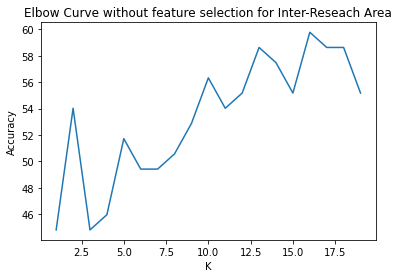


MLP Classifier score is 52.87356321839081%



In [129]:
# fitting logistic regression
lr = LogisticRegression()
lr.fit(features, y_train)
predictionsLR = lr.predict(features2)
scoreLR = accuracy_score(y_test, predictionsLR)
print(f"Logistic Regression score is {scoreLR * 100}% \n")

# fitting SVC
svc = svm.LinearSVC()
svc.fit(features, y_train)
predictionsSVC = svc.predict(features2)
scoreSVC = accuracy_score(y_test, predictionsSVC)
print(f"Support Vector Classifier score is {scoreSVC * 100}%\n")

# fitting decision tree classifier
clf = tree.DecisionTreeClassifier()
clf.fit(features, y_train)
predictionsTree = clf.predict(features2)
scoreTree = accuracy_score(y_test, predictionsTree)
print(f"Decision Tree Classifier score is {scoreTree * 100}%\n")

# fitting Random Forest classifier
clf1 = RandomForestClassifier(max_features=23)
clf1.fit(features, y_train)
predictionsTree1 = clf1.predict(features2)
scoreTree1 = accuracy_score(y_test, predictionsTree1)
print(f"Random Forest Classifier score is {scoreTree1 * 100}%\n")

# fitting XGBoost
# xgb = XGBClassifier()
# xgb.fit(features.to_numpy(), y_train)
# predictionsXGB = xgb.predict(X_test)
# predictionsXGB = (predictionsXGB>0.5).astype(int)
# scoreXGB = accuracy_score(y_test, predictionsXGB)
# print(f"XG Boost Classifier score is {scoreXGB * 100}%\n")

# fitting KNN Classifier
K = range(1, 20)
acc = []
for k in K:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(features, y_train)
    predictionsKNN = knn.predict(features2)
    scoreKNN = accuracy_score(y_test, predictionsKNN)
    print(f"KNN Classifier score is {scoreKNN * 100}% with k = {k}")
    acc.append(scoreKNN*100)

# Elbow plot:
plt.plot(K, acc)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title("Elbow Curve without feature selection for Inter-Reseach Area")

plt.show()

# MLP / ANN
classifier = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, activation='relu', solver='adam', random_state=1)
classifier.fit(features, y_train)
predictionsMLP = classifier.predict(features2)
scoreMLP = accuracy_score(y_test, predictionsMLP)
print(f"\nMLP Classifier score is {scoreMLP * 100}%\n")

In [130]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(features, y_train).predict(features2)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 87 points : 41


In [131]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# evaluate the model
# model = GradientBoostingClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = GradientBoostingClassifier()
model.fit(features, y_train)
# make a single prediction
# row = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = model.predict(features2)

print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

           0       0.31      0.58      0.41        24
           1       0.76      0.51      0.61        63

    accuracy                           0.53        87
   macro avg       0.54      0.55      0.51        87
weighted avg       0.64      0.53      0.55        87



In [132]:
# histogram-based gradient boosting for classification in scikit-learn
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# evaluate the model
# model = HistGradientBoostingClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, features, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = HistGradientBoostingClassifier()
model.fit(features, y_train)
# make a single prediction
yhat = model.predict(features2)
print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

           0       0.16      0.47      0.23        15
           1       0.81      0.47      0.60        72

    accuracy                           0.47        87
   macro avg       0.48      0.47      0.41        87
weighted avg       0.70      0.47      0.53        87



In [133]:
# xgboost for classification
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# evaluate the model
# model = XGBClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, features, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = XGBClassifier()
model.fit(features, y_train)
# make a single prediction
yhat = model.predict(features2)
print(classification_report(yhat,y_test))

ValueError: ignored

In [134]:
# lightgbm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# evaluate the model
# model = LGBMClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, features, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = LGBMClassifier()
model.fit(features, y_train)
# make a single prediction
yhat = model.predict(features2)
print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

           0       0.24      0.61      0.35        18
           1       0.83      0.51      0.63        69

    accuracy                           0.53        87
   macro avg       0.54      0.56      0.49        87
weighted avg       0.71      0.53      0.57        87



# Models embed

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



import warnings
warnings.filterwarnings('ignore')

In [138]:
features = X_train[embeded_lr_feature]
features2 = X_test[embeded_lr_feature]

In [139]:
features.isna().sum().sum()

0

In [140]:
X_test.isna().sum().sum()

0

In [141]:
from sklearn.model_selection import cross_val_score
# from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

# X, y = load_iris(return_X_y=True)
clf = AdaBoostClassifier()
# scores = cross_val_score(clf, features, y_train, cv=5)
# print(scores.mean())
clf.fit(features, y_train)
y_pred = (clf.predict(features2)>0.5).astype(int)
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.31      0.52      0.39        27
           1       0.69      0.48      0.57        60

    accuracy                           0.49        87
   macro avg       0.50      0.50      0.48        87
weighted avg       0.57      0.49      0.51        87



In [142]:
from sklearn.svm import SVC

svclassifier = SVC(gamma='auto')
svclassifier.fit(features, y_train)
y_pred = svclassifier.predict(features2)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.20      0.29        45
           1       0.49      0.81      0.61        42

    accuracy                           0.49        87
   macro avg       0.51      0.50      0.45        87
weighted avg       0.51      0.49      0.44        87



In [143]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier


clf1 = DecisionTreeClassifier()
clf2 = KNeighborsClassifier()
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)],
                        voting='soft', weights=[2, 2, 2])

clf1 = clf1.fit(features, y_train)
clf2 = clf2.fit(features, y_train)
clf3 = clf3.fit(features, y_train)
eclf = eclf.fit(features, y_train)

for clf, label in zip([clf1, clf2, clf3, eclf], ['DecisionTreeClassifier', 'KNNClassifier', 'SVC', 'voting']):
    scores = cross_val_score(clf, features, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.51 (+/- 0.04) [DecisionTreeClassifier]
Accuracy: 0.54 (+/- 0.01) [KNNClassifier]
Accuracy: 0.59 (+/- 0.02) [SVC]
Accuracy: 0.53 (+/- 0.04) [voting]


Logistic Regression score is 56.32183908045977% 

Support Vector Classifier score is 55.172413793103445%

Decision Tree Classifier score is 47.12643678160919%

Random Forest Classifier score is 48.275862068965516%

KNN Classifier score is 48.275862068965516% with k = 1
KNN Classifier score is 49.42528735632184% with k = 2
KNN Classifier score is 44.827586206896555% with k = 3
KNN Classifier score is 42.5287356321839% with k = 4
KNN Classifier score is 45.97701149425287% with k = 5
KNN Classifier score is 42.5287356321839% with k = 6
KNN Classifier score is 51.724137931034484% with k = 7
KNN Classifier score is 49.42528735632184% with k = 8
KNN Classifier score is 49.42528735632184% with k = 9
KNN Classifier score is 51.724137931034484% with k = 10
KNN Classifier score is 50.57471264367817% with k = 11
KNN Classifier score is 44.827586206896555% with k = 12
KNN Classifier score is 45.97701149425287% with k = 13
KNN Classifier score is 48.275862068965516% with k = 14
KNN Classifier score

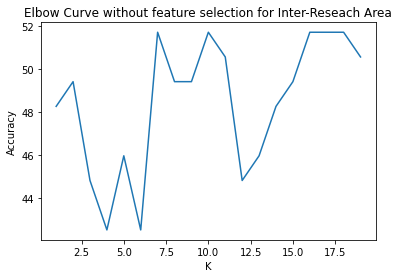


MLP Classifier score is 50.57471264367817%



In [144]:
# fitting logistic regression
lr = LogisticRegression()
lr.fit(features, y_train)
predictionsLR = lr.predict(features2)
scoreLR = accuracy_score(y_test, predictionsLR)
print(f"Logistic Regression score is {scoreLR * 100}% \n")

# fitting SVC
svc = svm.LinearSVC()
svc.fit(features, y_train)
predictionsSVC = svc.predict(features2)
scoreSVC = accuracy_score(y_test, predictionsSVC)
print(f"Support Vector Classifier score is {scoreSVC * 100}%\n")

# fitting decision tree classifier
clf = tree.DecisionTreeClassifier()
clf.fit(features, y_train)
predictionsTree = clf.predict(features2)
scoreTree = accuracy_score(y_test, predictionsTree)
print(f"Decision Tree Classifier score is {scoreTree * 100}%\n")

# fitting Random Forest classifier
clf1 = RandomForestClassifier(max_features=23)
clf1.fit(features, y_train)
predictionsTree1 = clf1.predict(features2)
scoreTree1 = accuracy_score(y_test, predictionsTree1)
print(f"Random Forest Classifier score is {scoreTree1 * 100}%\n")

# fitting XGBoost
# xgb = XGBClassifier()
# xgb.fit(features.to_numpy(), y_train)
# predictionsXGB = xgb.predict(X_test)
# predictionsXGB = (predictionsXGB>0.5).astype(int)
# scoreXGB = accuracy_score(y_test, predictionsXGB)
# print(f"XG Boost Classifier score is {scoreXGB * 100}%\n")

# fitting KNN Classifier
K = range(1, 20)
acc = []
for k in K:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(features, y_train)
    predictionsKNN = knn.predict(features2)
    scoreKNN = accuracy_score(y_test, predictionsKNN)
    print(f"KNN Classifier score is {scoreKNN * 100}% with k = {k}")
    acc.append(scoreKNN*100)

# Elbow plot:
plt.plot(K, acc)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title("Elbow Curve without feature selection for Inter-Reseach Area")

plt.show()

# MLP / ANN
classifier = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, activation='relu', solver='adam', random_state=1)
classifier.fit(features, y_train)
predictionsMLP = classifier.predict(features2)
scoreMLP = accuracy_score(y_test, predictionsMLP)
print(f"\nMLP Classifier score is {scoreMLP * 100}%\n")

In [145]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(features, y_train).predict(features2)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 87 points : 44


In [146]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# evaluate the model
# model = GradientBoostingClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = GradientBoostingClassifier()
model.fit(features, y_train)
# make a single prediction
# row = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = model.predict(features2)

print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

           0       0.29      0.52      0.37        25
           1       0.71      0.48      0.58        62

    accuracy                           0.49        87
   macro avg       0.50      0.50      0.47        87
weighted avg       0.59      0.49      0.52        87



In [147]:
# histogram-based gradient boosting for classification in scikit-learn
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# evaluate the model
# model = HistGradientBoostingClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, features, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = HistGradientBoostingClassifier()
model.fit(features, y_train)
# make a single prediction
yhat = model.predict(features2)
print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

           0       0.27      0.60      0.37        20
           1       0.81      0.51      0.62        67

    accuracy                           0.53        87
   macro avg       0.54      0.55      0.50        87
weighted avg       0.68      0.53      0.57        87



In [ ]:
# xgboost for classification
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# evaluate the model
# model = XGBClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, features, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = XGBClassifier()
model.fit(features, y_train)
# make a single prediction
yhat = model.predict(features2)
print(classification_report(yhat,y_test))

ValueError: ignored

In [148]:
# lightgbm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# evaluate the model
# model = LGBMClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, features, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = LGBMClassifier()
model.fit(features, y_train)
# make a single prediction
yhat = model.predict(features2)
print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

           0       0.24      0.65      0.35        17
           1       0.86      0.51      0.64        70

    accuracy                           0.54        87
   macro avg       0.55      0.58      0.50        87
weighted avg       0.74      0.54      0.59        87



# Models embed rf

In [18]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



import warnings
warnings.filterwarnings('ignore')

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
features = X_train[embeded_rf_feature]
features2 = X_test[embeded_rf_feature]

In [20]:
features.isna().sum().sum()

0

In [21]:
X_test.isna().sum().sum()

0

In [24]:
from sklearn.model_selection import cross_val_score
# from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

# X, y = load_iris(return_X_y=True)
clf = AdaBoostClassifier()
# scores = cross_val_score(clf, features, y_train, cv=5)
# print(scores.mean())
clf.fit(features, y_train)
y_pred = (clf.predict(features2)>0.5).astype(int)
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.22      0.42      0.29        24
           1       0.67      0.44      0.53        63

    accuracy                           0.44        87
   macro avg       0.44      0.43      0.41        87
weighted avg       0.54      0.44      0.47        87



In [25]:
from sklearn.svm import SVC

svclassifier = SVC(gamma='auto')
svclassifier.fit(features, y_train)
y_pred = svclassifier.predict(features2)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.20      0.28        45
           1       0.47      0.76      0.58        42

    accuracy                           0.47        87
   macro avg       0.47      0.48      0.43        87
weighted avg       0.47      0.47      0.43        87



In [26]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier


clf1 = DecisionTreeClassifier()
clf2 = KNeighborsClassifier()
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)],
                        voting='soft', weights=[2, 2, 2])

clf1 = clf1.fit(features, y_train)
clf2 = clf2.fit(features, y_train)
clf3 = clf3.fit(features, y_train)
eclf = eclf.fit(features, y_train)

for clf, label in zip([clf1, clf2, clf3, eclf], ['DecisionTreeClassifier', 'KNNClassifier', 'SVC', 'voting']):
    scores = cross_val_score(clf, features, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.51 (+/- 0.01) [DecisionTreeClassifier]
Accuracy: 0.52 (+/- 0.03) [KNNClassifier]
Accuracy: 0.55 (+/- 0.02) [SVC]
Accuracy: 0.53 (+/- 0.04) [voting]


Logistic Regression score is 49.42528735632184% 

Support Vector Classifier score is 52.87356321839081%

Decision Tree Classifier score is 47.12643678160919%

Random Forest Classifier score is 51.724137931034484%

KNN Classifier score is 47.12643678160919% with k = 1
KNN Classifier score is 44.827586206896555% with k = 2
KNN Classifier score is 47.12643678160919% with k = 3
KNN Classifier score is 47.12643678160919% with k = 4
KNN Classifier score is 50.57471264367817% with k = 5
KNN Classifier score is 45.97701149425287% with k = 6
KNN Classifier score is 52.87356321839081% with k = 7
KNN Classifier score is 51.724137931034484% with k = 8
KNN Classifier score is 54.02298850574713% with k = 9
KNN Classifier score is 52.87356321839081% with k = 10
KNN Classifier score is 51.724137931034484% with k = 11
KNN Classifier score is 51.724137931034484% with k = 12
KNN Classifier score is 54.02298850574713% with k = 13
KNN Classifier score is 54.02298850574713% with k = 14
KNN Classifier score 

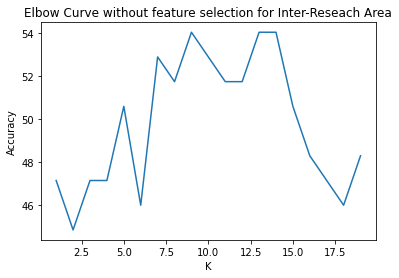


MLP Classifier score is 47.12643678160919%



In [27]:
# fitting logistic regression
lr = LogisticRegression()
lr.fit(features, y_train)
predictionsLR = lr.predict(features2)
scoreLR = accuracy_score(y_test, predictionsLR)
print(f"Logistic Regression score is {scoreLR * 100}% \n")

# fitting SVC
svc = svm.LinearSVC()
svc.fit(features, y_train)
predictionsSVC = svc.predict(features2)
scoreSVC = accuracy_score(y_test, predictionsSVC)
print(f"Support Vector Classifier score is {scoreSVC * 100}%\n")

# fitting decision tree classifier
clf = tree.DecisionTreeClassifier()
clf.fit(features, y_train)
predictionsTree = clf.predict(features2)
scoreTree = accuracy_score(y_test, predictionsTree)
print(f"Decision Tree Classifier score is {scoreTree * 100}%\n")

# fitting Random Forest classifier
clf1 = RandomForestClassifier(max_features=23)
clf1.fit(features, y_train)
predictionsTree1 = clf1.predict(features2)
scoreTree1 = accuracy_score(y_test, predictionsTree1)
print(f"Random Forest Classifier score is {scoreTree1 * 100}%\n")

# fitting XGBoost
# xgb = XGBClassifier()
# xgb.fit(features.to_numpy(), y_train)
# predictionsXGB = xgb.predict(X_test)
# predictionsXGB = (predictionsXGB>0.5).astype(int)
# scoreXGB = accuracy_score(y_test, predictionsXGB)
# print(f"XG Boost Classifier score is {scoreXGB * 100}%\n")

# fitting KNN Classifier
K = range(1, 20)
acc = []
for k in K:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(features, y_train)
    predictionsKNN = knn.predict(features2)
    scoreKNN = accuracy_score(y_test, predictionsKNN)
    print(f"KNN Classifier score is {scoreKNN * 100}% with k = {k}")
    acc.append(scoreKNN*100)

# Elbow plot:
plt.plot(K, acc)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title("Elbow Curve without feature selection for Inter-Reseach Area")

plt.show()

# MLP / ANN
classifier = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, activation='relu', solver='adam', random_state=1)
classifier.fit(features, y_train)
predictionsMLP = classifier.predict(features2)
scoreMLP = accuracy_score(y_test, predictionsMLP)
print(f"\nMLP Classifier score is {scoreMLP * 100}%\n")

In [30]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(features, y_train).predict(features2)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

print(classification_report(y_test,y_pred))

Number of mislabeled points out of a total 87 points : 48
              precision    recall  f1-score   support

           0       0.47      0.58      0.52        45
           1       0.41      0.31      0.35        42

    accuracy                           0.45        87
   macro avg       0.44      0.44      0.44        87
weighted avg       0.44      0.45      0.44        87



In [29]:
from numpy import mean
from numpy import std
# from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# evaluate the model
# model = GradientBoostingClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = GradientBoostingClassifier()
model.fit(features, y_train)
# make a single prediction
# row = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = model.predict(features2)

print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

           0       0.33      0.56      0.42        27
           1       0.71      0.50      0.59        60

    accuracy                           0.52        87
   macro avg       0.52      0.53      0.50        87
weighted avg       0.60      0.52      0.53        87



In [31]:
# histogram-based gradient boosting for classification in scikit-learn
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# evaluate the model
# model = HistGradientBoostingClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, features, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = HistGradientBoostingClassifier()
model.fit(features, y_train)
# make a single prediction
yhat = model.predict(features2)
print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

           0       0.16      0.54      0.24        13
           1       0.86      0.49      0.62        74

    accuracy                           0.49        87
   macro avg       0.51      0.51      0.43        87
weighted avg       0.75      0.49      0.56        87



In [32]:
# xgboost for classification
from numpy import asarray
from numpy import mean
from numpy import std
# from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# evaluate the model
# model = XGBClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, features, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = XGBClassifier()
model.fit(features, y_train)
# make a single prediction
yhat = model.predict(features2)
print(classification_report(yhat,y_test))

ValueError: ignored

In [33]:
# lightgbm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# evaluate the model
# model = LGBMClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, features, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = LGBMClassifier()
model.fit(features, y_train)
# make a single prediction
yhat = model.predict(features2)
print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

           0       0.33      0.58      0.42        26
           1       0.74      0.51      0.60        61

    accuracy                           0.53        87
   macro avg       0.54      0.54      0.51        87
weighted avg       0.62      0.53      0.55        87



# Models lgbm

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



import warnings
warnings.filterwarnings('ignore')

In [ ]:
features = X_train[embeded_lgb_feature]
features2 = X_test[embeded_lgb_feature]

In [ ]:
features.isna().sum().sum()

0

In [ ]:
X_test.isna().sum().sum()

0

In [ ]:
from sklearn.model_selection import cross_val_score
# from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

# X, y = load_iris(return_X_y=True)
clf = AdaBoostClassifier()
# scores = cross_val_score(clf, features, y_train, cv=5)
# print(scores.mean())
clf.fit(features, y_train)
y_pred = (clf.predict(features2)>0.5).astype(int)
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.31      0.52      0.39        27
           1       0.69      0.48      0.57        60

    accuracy                           0.49        87
   macro avg       0.50      0.50      0.48        87
weighted avg       0.57      0.49      0.51        87



In [ ]:
from sklearn.svm import SVC

svclassifier = SVC(gamma='auto')
svclassifier.fit(features, y_train)
y_pred = svclassifier.predict(features2)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.20      0.29        45
           1       0.49      0.81      0.61        42

    accuracy                           0.49        87
   macro avg       0.51      0.50      0.45        87
weighted avg       0.51      0.49      0.44        87



In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier


clf1 = DecisionTreeClassifier()
clf2 = KNeighborsClassifier()
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)],
                        voting='soft', weights=[2, 2, 2])

clf1 = clf1.fit(features, y_train)
clf2 = clf2.fit(features, y_train)
clf3 = clf3.fit(features, y_train)
eclf = eclf.fit(features, y_train)

for clf, label in zip([clf1, clf2, clf3, eclf], ['DecisionTreeClassifier', 'KNNClassifier', 'SVC', 'voting']):
    scores = cross_val_score(clf, features, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.51 (+/- 0.04) [DecisionTreeClassifier]
Accuracy: 0.54 (+/- 0.01) [KNNClassifier]
Accuracy: 0.59 (+/- 0.02) [SVC]
Accuracy: 0.53 (+/- 0.04) [voting]


Logistic Regression score is 56.32183908045977% 

Support Vector Classifier score is 55.172413793103445%

Decision Tree Classifier score is 47.12643678160919%

Random Forest Classifier score is 48.275862068965516%

KNN Classifier score is 48.275862068965516% with k = 1
KNN Classifier score is 49.42528735632184% with k = 2
KNN Classifier score is 44.827586206896555% with k = 3
KNN Classifier score is 42.5287356321839% with k = 4
KNN Classifier score is 45.97701149425287% with k = 5
KNN Classifier score is 42.5287356321839% with k = 6
KNN Classifier score is 51.724137931034484% with k = 7
KNN Classifier score is 49.42528735632184% with k = 8
KNN Classifier score is 49.42528735632184% with k = 9
KNN Classifier score is 51.724137931034484% with k = 10
KNN Classifier score is 50.57471264367817% with k = 11
KNN Classifier score is 44.827586206896555% with k = 12
KNN Classifier score is 45.97701149425287% with k = 13
KNN Classifier score is 48.275862068965516% with k = 14
KNN Classifier score

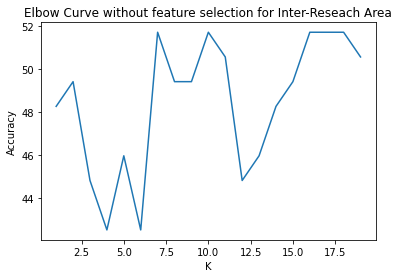


MLP Classifier score is 50.57471264367817%



In [ ]:
# fitting logistic regression
lr = LogisticRegression()
lr.fit(features, y_train)
predictionsLR = lr.predict(features2)
scoreLR = accuracy_score(y_test, predictionsLR)
print(f"Logistic Regression score is {scoreLR * 100}% \n")

# fitting SVC
svc = svm.LinearSVC()
svc.fit(features, y_train)
predictionsSVC = svc.predict(features2)
scoreSVC = accuracy_score(y_test, predictionsSVC)
print(f"Support Vector Classifier score is {scoreSVC * 100}%\n")

# fitting decision tree classifier
clf = tree.DecisionTreeClassifier()
clf.fit(features, y_train)
predictionsTree = clf.predict(features2)
scoreTree = accuracy_score(y_test, predictionsTree)
print(f"Decision Tree Classifier score is {scoreTree * 100}%\n")

# fitting Random Forest classifier
clf1 = RandomForestClassifier(max_features=23)
clf1.fit(features, y_train)
predictionsTree1 = clf1.predict(features2)
scoreTree1 = accuracy_score(y_test, predictionsTree1)
print(f"Random Forest Classifier score is {scoreTree1 * 100}%\n")

# fitting XGBoost
# xgb = XGBClassifier()
# xgb.fit(features.to_numpy(), y_train)
# predictionsXGB = xgb.predict(X_test)
# predictionsXGB = (predictionsXGB>0.5).astype(int)
# scoreXGB = accuracy_score(y_test, predictionsXGB)
# print(f"XG Boost Classifier score is {scoreXGB * 100}%\n")

# fitting KNN Classifier
K = range(1, 20)
acc = []
for k in K:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(features, y_train)
    predictionsKNN = knn.predict(features2)
    scoreKNN = accuracy_score(y_test, predictionsKNN)
    print(f"KNN Classifier score is {scoreKNN * 100}% with k = {k}")
    acc.append(scoreKNN*100)

# Elbow plot:
plt.plot(K, acc)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title("Elbow Curve without feature selection for Inter-Reseach Area")

plt.show()

# MLP / ANN
classifier = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, activation='relu', solver='adam', random_state=1)
classifier.fit(features, y_train)
predictionsMLP = classifier.predict(features2)
scoreMLP = accuracy_score(y_test, predictionsMLP)
print(f"\nMLP Classifier score is {scoreMLP * 100}%\n")

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(features, y_train).predict(features2)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 87 points : 44


In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# evaluate the model
# model = GradientBoostingClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = GradientBoostingClassifier()
model.fit(features, y_train)
# make a single prediction
# row = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = model.predict(features2)

print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

           0       0.29      0.52      0.37        25
           1       0.71      0.48      0.58        62

    accuracy                           0.49        87
   macro avg       0.50      0.50      0.47        87
weighted avg       0.59      0.49      0.52        87



In [ ]:
# histogram-based gradient boosting for classification in scikit-learn
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# evaluate the model
# model = HistGradientBoostingClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, features, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = HistGradientBoostingClassifier()
model.fit(features, y_train)
# make a single prediction
yhat = model.predict(features2)
print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

           0       0.27      0.60      0.37        20
           1       0.81      0.51      0.62        67

    accuracy                           0.53        87
   macro avg       0.54      0.55      0.50        87
weighted avg       0.68      0.53      0.57        87



In [ ]:
# xgboost for classification
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# evaluate the model
# model = XGBClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, features, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = XGBClassifier()
model.fit(features, y_train)
# make a single prediction
yhat = model.predict(features2)
print(classification_report(yhat,y_test))

ValueError: ignored

In [ ]:
# lightgbm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# evaluate the model
# model = LGBMClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, features, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = LGBMClassifier()
model.fit(features, y_train)
# make a single prediction
yhat = model.predict(features2)
print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

           0       0.24      0.65      0.35        17
           1       0.86      0.51      0.64        70

    accuracy                           0.54        87
   macro avg       0.55      0.58      0.50        87
weighted avg       0.74      0.54      0.59        87

